In [3]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from sklearn.model_selection import train_test_split


random.seed(123) 
np.random.seed(123) 

In [4]:
df=pd.read_csv("merged_dataset.csv",engine="python", sep=",") 
y=df["Is.Fraudulent"].values.copy()
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42,stratify=y)
# df_test.to_csv("testData.csv", index=False)
df=df_train

In [5]:
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,source,browser,sex,Payment.Method,Product.Category,Quantity,Device.Used,Address.Match
166592,2024-03-03 00:27:27,171.98,12,0,356,0,SEO,IE,M,PayPal,home & garden,2,mobile,1
50425,2015-08-26 20:33:33,71.00,33,0,62,20,Ads,Chrome,F,debit card,electronics,3,mobile,1
21786,2015-05-02 23:03:23,28.00,30,0,9,23,SEO,IE,M,debit card,health & beauty,5,desktop,1
108859,2024-01-08 11:01:40,155.15,21,0,235,11,Ads,Chrome,F,debit card,toys & games,1,mobile,1
195708,2015-06-30 21:00:17,24.00,19,0,38,21,SEO,IE,F,credit card,health & beauty,2,desktop,0


In [6]:
df.describe()

,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,Quantity,Address.Match
count,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000
mean,132.227654,33.840733,0.072010,117.790462,11.418076,3.004110,0.898619
std,213.642353,9.397406,0.258504,100.580938,6.947102,1.415868,0.301833
min,9.000000,-8.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,27.000000,0.000000,40.000000,5.000000,2.000000,1.000000
50%,53.000000,33.000000,0.000000,87.000000,11.000000,3.000000,1.000000
75%,153.092500,40.000000,0.000000,178.000000,17.000000,4.000000,1.000000
max,8329.900000,79.000000,1.000000,365.000000,23.000000,5.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210000 entries, 166592 to 226296
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    210000 non-null  object 
 1   Transaction.Amount  210000 non-null  float64
 2   Customer.Age        210000 non-null  int64  
 3   Is.Fraudulent       210000 non-null  int64  
 4   Account.Age.Days    210000 non-null  int64  
 5   Transaction.Hour    210000 non-null  int64  
 6   source              210000 non-null  object 
 7   browser             210000 non-null  object 
 8   sex                 210000 non-null  object 
 9   Payment.Method      210000 non-null  object 
 10  Product.Category    210000 non-null  object 
 11  Quantity            210000 non-null  int64  
 12  Device.Used         210000 non-null  object 
 13  Address.Match       210000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 24.0+ MB


In [8]:
df.isnull().sum()

Transaction.Date      0
Transaction.Amount    0
Customer.Age          0
Is.Fraudulent         0
Account.Age.Days      0
Transaction.Hour      0
source                0
browser               0
sex                   0
Payment.Method        0
Product.Category      0
Quantity              0
Device.Used           0
Address.Match         0
dtype: int64

array([[<Axes: title={'center': 'Transaction.Amount'}>,
        <Axes: title={'center': 'Customer.Age'}>,
        <Axes: title={'center': 'Is.Fraudulent'}>],
       [<Axes: title={'center': 'Account.Age.Days'}>,
        <Axes: title={'center': 'Transaction.Hour'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Address.Match'}>, <Axes: >, <Axes: >]],
      dtype=object)

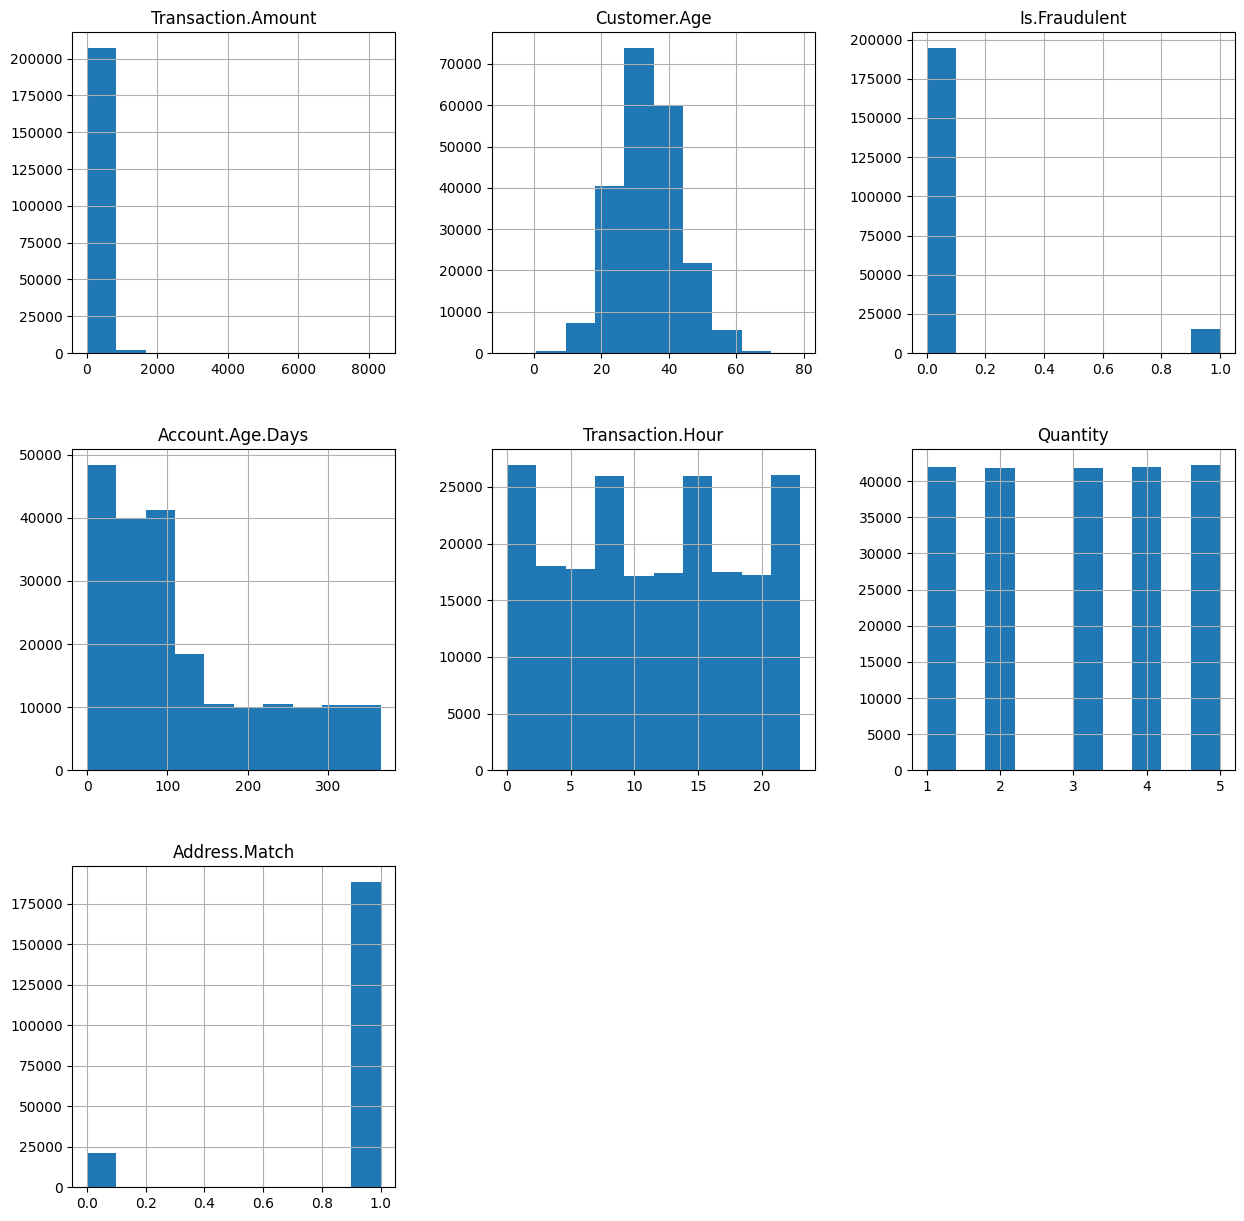

In [9]:
df.hist(figsize=(15,15))

In [10]:
NUMERIC=["Transaction.Amount",'Customer.Age','Account.Age.Days','Quantity']
CATEGORICAL = [x for x in df.columns if x not in NUMERIC]

#### CATEGORICAL

<Axes: >

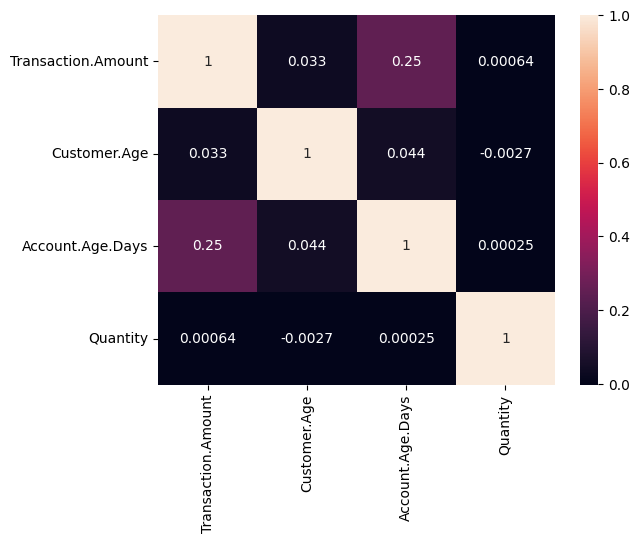

In [11]:
sns.heatmap(df[NUMERIC].corr(), annot=True)

<Axes: xlabel='Device.Used', ylabel='Count'>

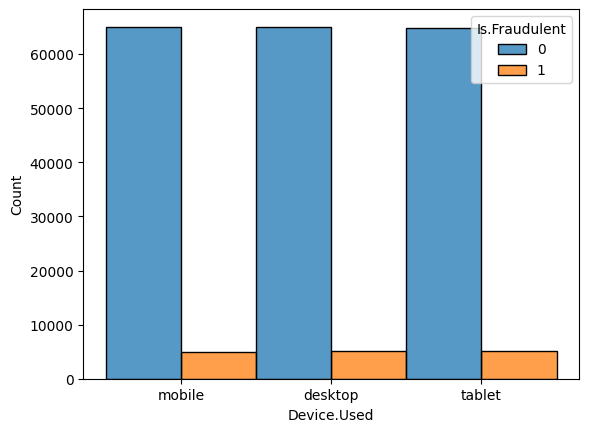

In [12]:
sns.histplot(data=df, x="Device.Used", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='Payment.Method', ylabel='Count'>

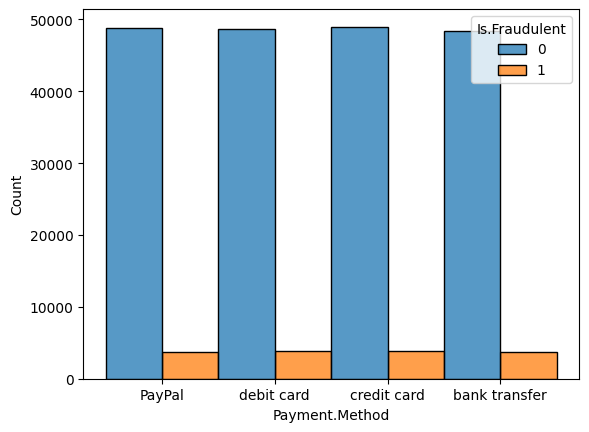

In [13]:
sns.histplot(data=df, x="Payment.Method", hue="Is.Fraudulent", multiple="dodge") # nothing interesting

<Axes: xlabel='browser', ylabel='Count'>

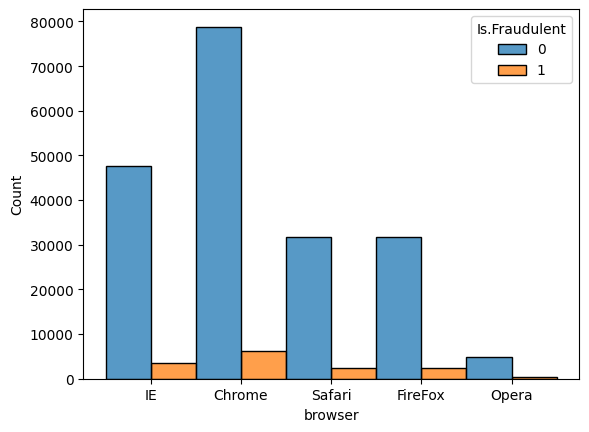

In [14]:
sns.histplot(data=df, x="browser", hue="Is.Fraudulent", multiple="dodge") # might be because chrome most popular?

<Axes: xlabel='Transaction.Hour', ylabel='Count'>

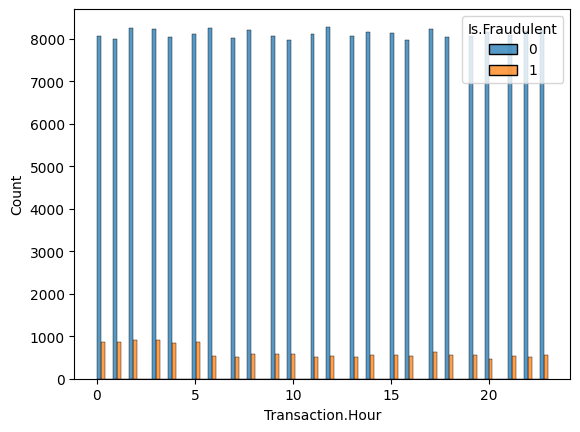

In [15]:
sns.histplot(data=df, x="Transaction.Hour", hue="Is.Fraudulent", multiple="dodge") # hour seems to matter

### NUMERIC

In [36]:
temp=df.groupby(["Is.Fraudulent"])["Account.Age.Days"].mean() #MOST PREDICIVE FEATURE
tempDf = temp.reset_index()
tempDf.columns = ['Is.Fraudulent', 'Account.Age.Days.Mean']
colors=["blue","red"] 
tempDf

,Is.Fraudulent,Account.Age.Days.Mean
0,0,122.400173
1,1,58.384870


/var/folders/lv/tkghl1_16tqcn5rtywgj_bgw0000gn/T/ipykernel_41414/2236665228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempDf,y="Account.Age.Days.Mean",x="Is.Fraudulent",palette=colors)


<Axes: xlabel='Is.Fraudulent', ylabel='Account.Age.Days.Mean'>

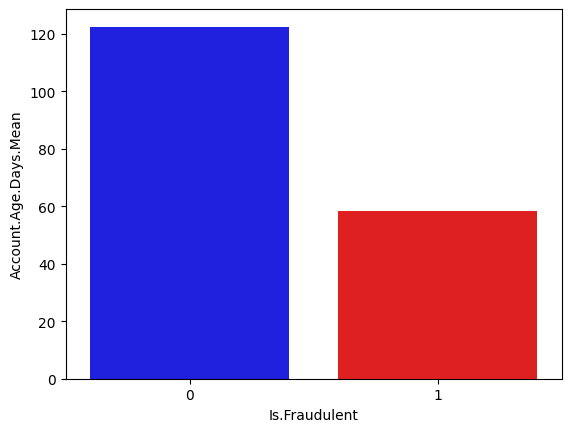

In [37]:
sns.barplot(data=tempDf,y="Account.Age.Days.Mean",x="Is.Fraudulent",palette=colors)

/var/folders/lv/tkghl1_16tqcn5rtywgj_bgw0000gn/T/ipykernel_41414/69102667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempDf,y="Transaction.Amount",x="Is.Fraudulent",palette=colors)


<Axes: xlabel='Is.Fraudulent', ylabel='Transaction.Amount'>

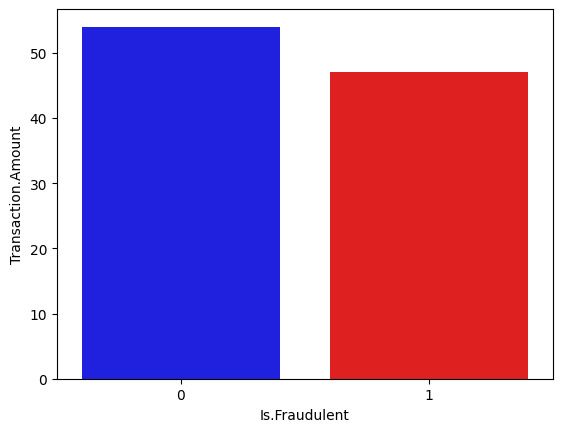

In [39]:
temp=df.groupby(["Is.Fraudulent"])["Transaction.Amount"].median()
tempDf = temp.reset_index()
tempDf.columns = ['Is.Fraudulent', "Transaction.Amount"]
colors=["blue","red"] 
sns.barplot(data=tempDf,y="Transaction.Amount",x="Is.Fraudulent",palette=colors)

<Axes: xlabel='Quantity', ylabel='Count'>

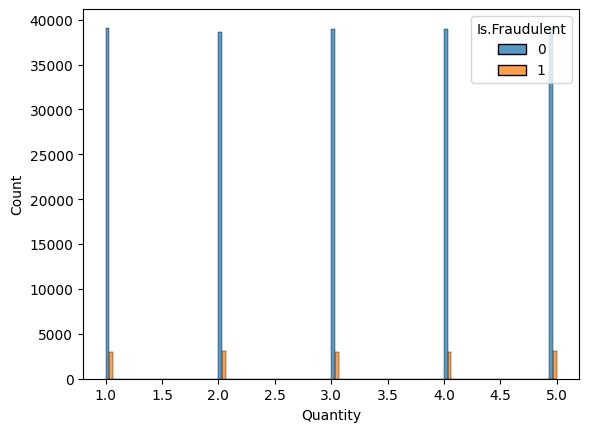

In [19]:
sns.histplot(data=df,x="Quantity",hue="Is.Fraudulent",multiple="dodge") #Nothing fancy

<Axes: xlabel='Customer.Age', ylabel='Count'>

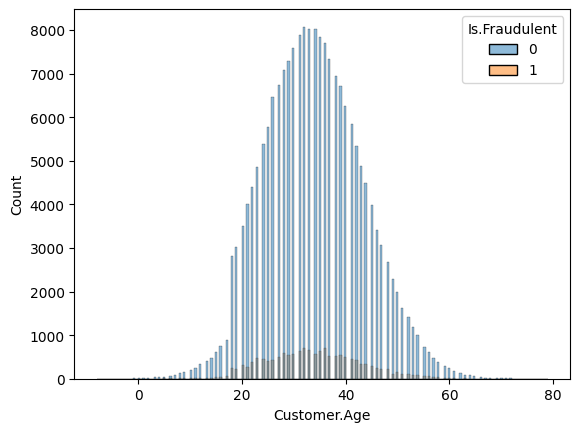

In [20]:
sns.histplot(data=df,x="Customer.Age",hue="Is.Fraudulent") 

In [21]:
df['Transaction.Date']

166592    2024-03-03 00:27:27
50425     2015-08-26 20:33:33
21786     2015-05-02 23:03:23
108859    2024-01-08 11:01:40
195708    2015-06-30 21:00:17
                 ...         
141388    2015-12-03 03:39:29
137307    2015-05-13 01:45:22
161762    2024-02-27 07:55:35
67915     2015-03-24 20:15:23
226296    2015-03-04 23:46:08
Name: Transaction.Date, Length: 210000, dtype: object

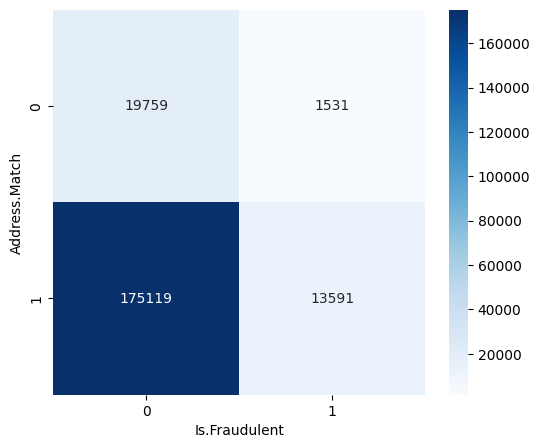

In [22]:
binary_crosstab = pd.crosstab(df["Address.Match"], df["Is.Fraudulent"]) #matching address

plt.figure(figsize=(6, 5))
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt="d")
plt.show()

<Axes: xlabel='Is.Fraudulent', ylabel='Address.Match'>

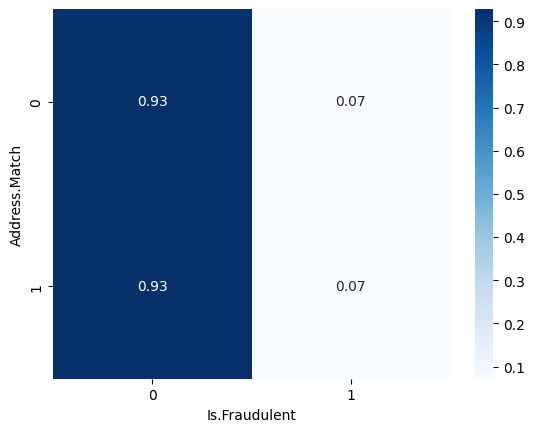

In [23]:
binary_crosstab = pd.crosstab(df["Address.Match"], df["Is.Fraudulent"], normalize="index") #???
sns.heatmap(binary_crosstab, annot=True, cmap="Blues", fmt=".2f")